#ASSIGNMENT - A3(Part A)
# **Performing Logistic regression analysis on Campaign_responses dataset**

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 07/01/2024

This analysis aims to analyze the responses to a marketing campaign using two machine
learning models: logistic regression and decision tree. The primary goal is to predict whether a
customer will respond to the campaign based on various features. By comparing these models,
we can determine which one provides better predictive performance and insights

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/SCMA/A3/campaign_responses.csv')

In [3]:
data.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


#Logistic Regression Analysis

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report

In [5]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['gender', 'employed', 'marital_status'], drop_first=True)
# Convert the target variable to binary
data['responded'] = data['responded'].map({'No': 0, 'Yes': 1})

In [6]:
# Split the dataset into features and target variable
X = data.drop('responded', axis=1)
y = data['responded']

In [7]:
X.head()

,customer_id,age,annual_income,credit_score,no_of_children,gender_Male,employed_Yes,marital_status_Single
0,1,35,65000,720,2,True,True,False
1,2,28,45000,680,0,False,False,True
2,3,42,85000,750,3,True,True,False
3,4,31,55000,710,1,False,True,True
4,5,47,95000,790,2,True,True,False


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: responded, dtype: int64

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

In [10]:
# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


In [11]:
# Evaluate the model with a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[ 6  0]
 [ 1 10]]


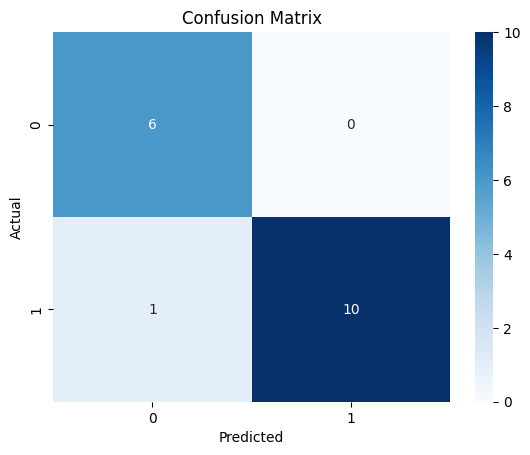

In [12]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

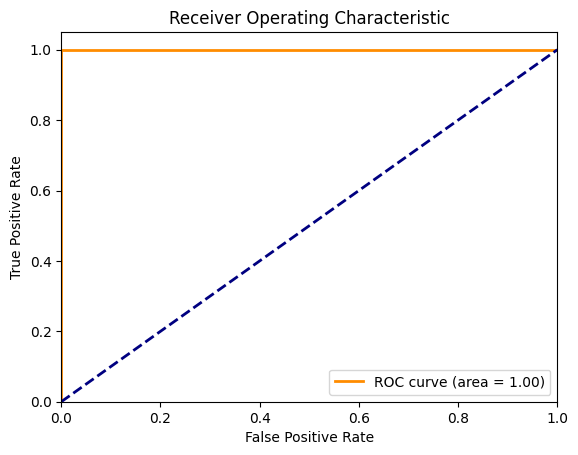

In [14]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
#Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.91      0.95        11

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



#Decision Tree Analysis

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [17]:
# Create a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_tree = tree.predict(X_test)
y_pred_prob_tree = tree.predict_proba(X_test)[:, 1]

In [18]:
# Evaluate the model with a confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print('Confusion Matrix (Decision Tree):')
print(conf_matrix_tree)


Confusion Matrix (Decision Tree):
[[ 6  0]
 [ 1 10]]


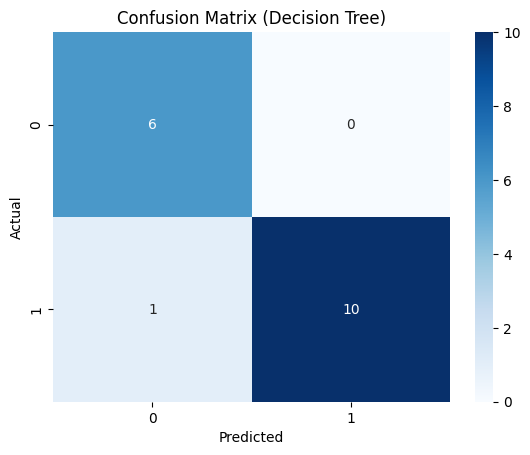

In [19]:
# Plot the confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


In [20]:
# Calculate the ROC curve and AUC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)


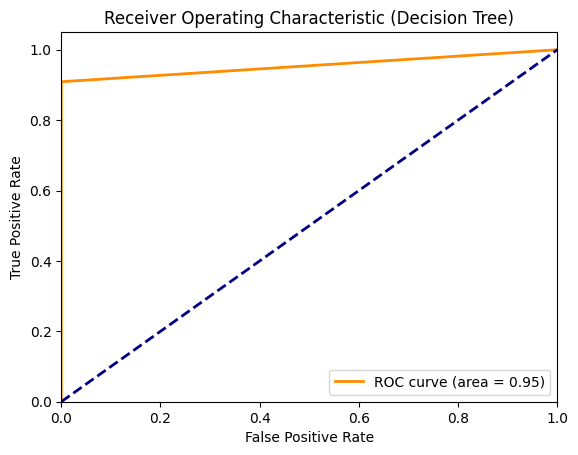

In [21]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

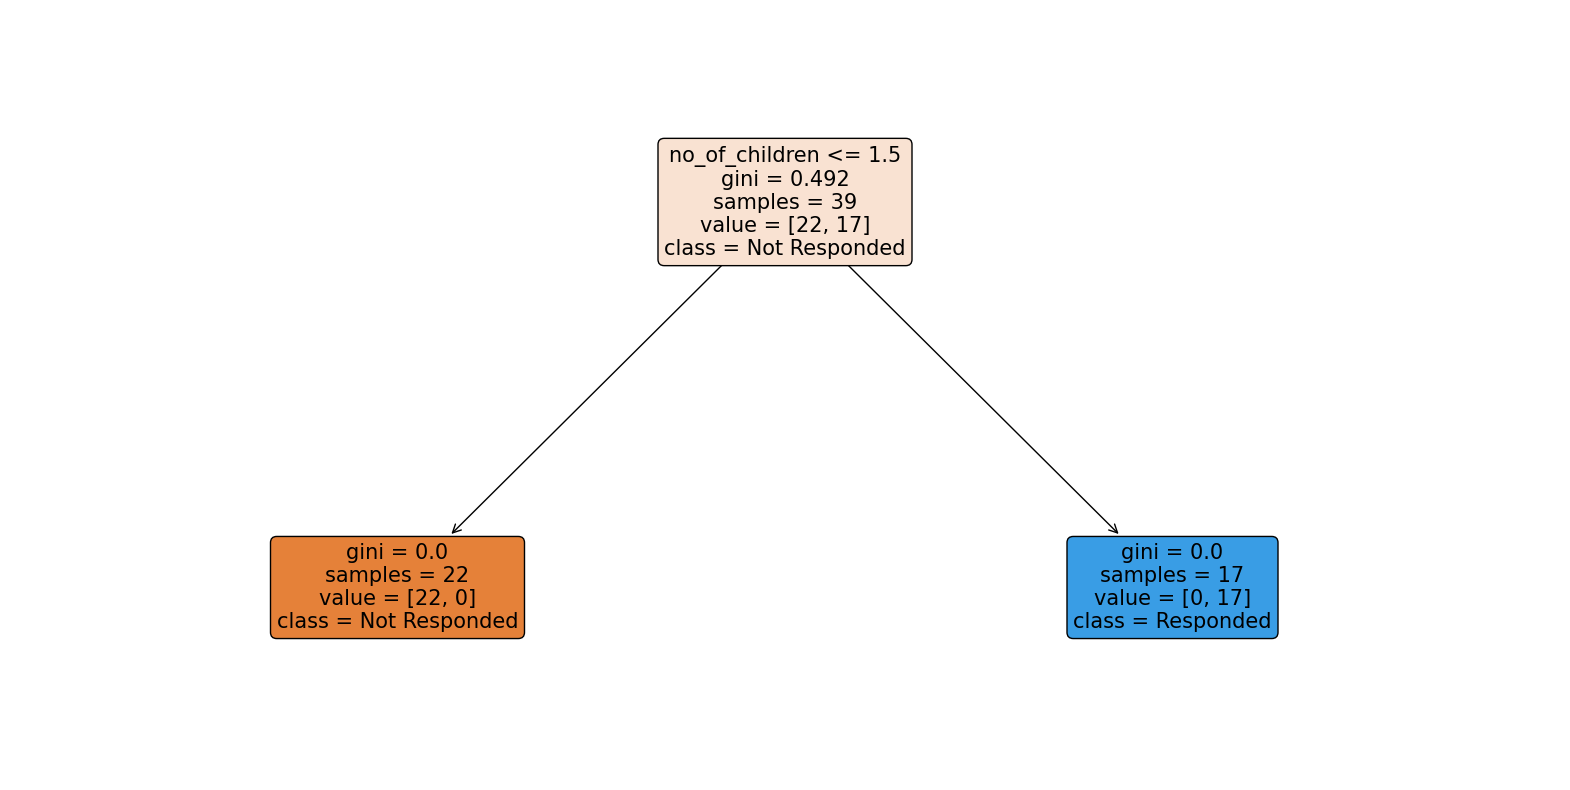

<Figure size 2500x2500 with 0 Axes>

In [33]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Responded', 'Responded'], rounded=True,fontsize=15)
plt.figure(figsize=(5, 5), dpi=500)
plt.show()

In [34]:
# Print the classification report
print('Classification Report (Decision Tree):')
print(classification_report(y_test, y_pred_tree))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.91      0.95        11

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



#Comparing the performance of the logistic regression and decision tree models

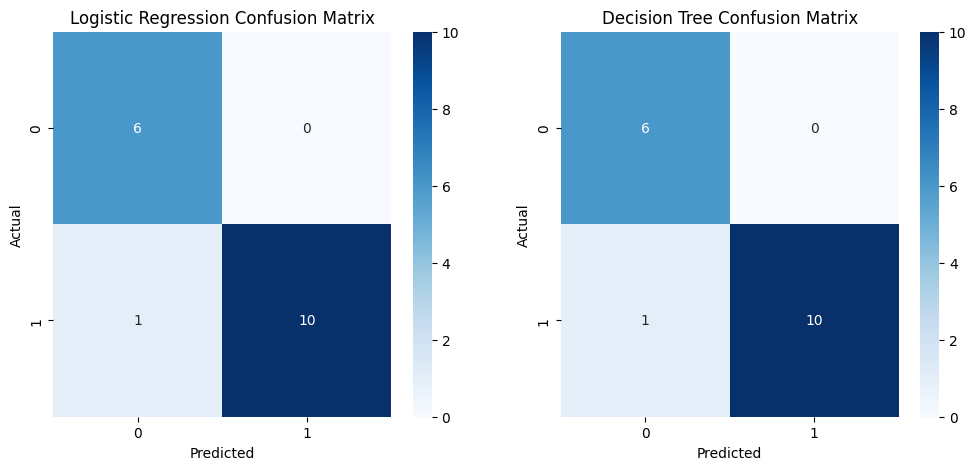

In [44]:
# Confusion Matrices
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


In [45]:
# Create a dataframe to hold the classification report metrics for both models
logreg_report = classification_report(y_test, y_pred, output_dict=True)
tree_report = classification_report(y_test, y_pred_tree, output_dict=True)

# Extract metrics for class '1' (responded)
metrics = ['precision', 'recall', 'f1-score', 'support']
logreg_metrics = [logreg_report['1'][metric] for metric in metrics]
tree_metrics = [tree_report['1'][metric] for metric in metrics]


In [40]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': logreg_metrics,
    'Decision Tree': tree_metrics
})

# Print the comparison dataframe
print(comparison_df)

      Metric  Logistic Regression  Decision Tree
0  precision             1.000000       1.000000
1     recall             0.909091       0.909091
2   f1-score             0.952381       0.952381
3    support            11.000000      11.000000


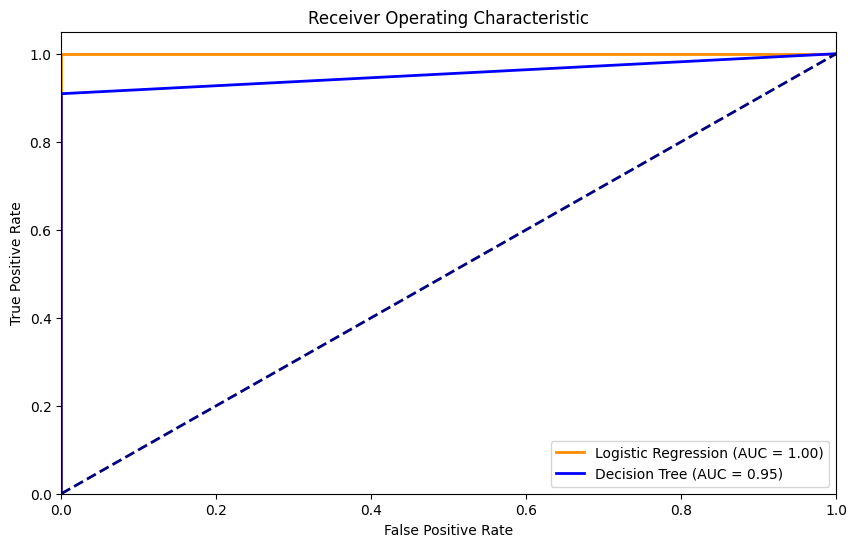

In [41]:
# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Print the AUC values
print('AUC for Logistic Regression:', roc_auc)
print('AUC for Decision Tree:', roc_auc_tree)

AUC for Logistic Regression: 1.0
AUC for Decision Tree: 0.9545454545454546
